In [1]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import datetime
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
base = importr('base')
utils = importr('utils')
stats = importr('stats')


In [3]:

rpy2_logger.setLevel(logging.ERROR)

In [4]:
utils.install_packages('neonUtilities', repos='https://cran.rstudio.com/');



The downloaded binary packages are in
	/var/folders/ld/nnc4sjg551xf7dyd1c71n7tr0000gn/T//RtmpGYrl7z/downloaded_packages


In [5]:
neonUtilities = importr('neonUtilities')


In [6]:
neonUtilities.stackByTable(filepath='./NEON_chem-surfacewater.zip')


Stacking table swc_externalLabSummaryData
  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Stacking operation across a single core.
Stacking table swc_asiPOMFieldData
  |                                                  | 0 % ~calculating   |+++++                                             | 9 % ~00s           |++++++++++                                        | 18% ~00s           |++++++++++++++                                    | 27% ~00s           |+++++++++++++++++++                               | 36% ~00s           |+++++++++++++++++++++++                           | 45% ~00s           |++++++++++++++++++++++++++++                      | 55% ~00s           |++++++++++++++++++++++++++++++++                  | 64% ~00s           |+++++++++++++++++++++++++++++++++++++             | 73% ~00s           |+++++++++++++

<rpy2.rinterface_lib.sexp.NULLType object at 0x107b3aec0> [RTYPES.NILSXP]

In [63]:

df = pd.read_csv('./NEON_chem-surfacewater/stackedFiles/swc_domainLabData.csv',parse_dates=['collectDate'],usecols=['collectDate','alkMgPerL'])




In [64]:
df['collectDate'] = df['collectDate'].dt.month_name().str[:3]
print(type(df['collectDate'][1]))

<class 'str'>


In [65]:
df

,collectDate,alkMgPerL
0,Jan,NaN
1,Jan,58.1
2,Feb,62.0
3,Feb,59.3
4,Feb,NaN
5,Mar,63.0
6,Mar,NaN
7,Mar,64.0
8,May,44.0
9,May,NaN


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Mg Per Litre')]

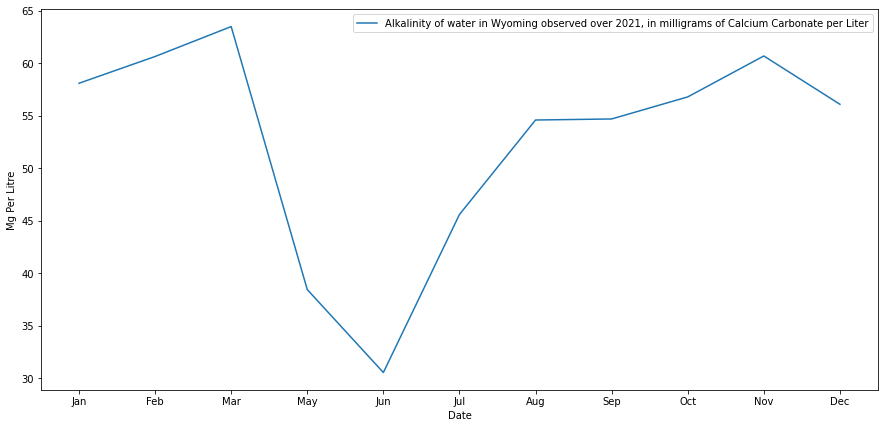

In [67]:
plt.figure(figsize=(15, 7))
plot = sns.lineplot(x = 'collectDate',y = 'alkMgPerL',data = df,label='Alkalinity of water in Wyoming observed over 2021, in milligrams of Calcium Carbonate per Liter',ci=None)
plot.set(xlabel = "Date", ylabel = "Mg Per Litre")


